In [1]:
import pickle as pck
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
# import pylandau as pland
# import ROOT
import sys
import scipy.ndimage as ndimage
import numpy.ma as ma
from functions_MuonsNSAMP1 import diffution_vertical_muon, check_flip_vertical_muon

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))
    

def diffution_curve(z, alpha, beta):
    return np.sqrt(np.abs(alpha * np.log(1 - (beta * z))))
    
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, letter
from reportlab.lib.utils import ImageReader

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    "axes.linewidth":2,
    "lines.linewidth" : 1,
    "font.size":    15.0,
    "xaxis.labellocation": 'right',  # alignment of the xaxis label: {left, right, center}
    "yaxis.labellocation": 'top',  # alignment of the yaxis label: {bottom, top, center}
    "xtick.top":           True ,  # draw ticks on the top side
    "xtick.major.size":    8    ,# major tick size in points
    "xtick.minor.size":    4      ,# minor tick size in points
    "xtick.direction":     'in',
    "xtick.minor.visible": True,
    "ytick.right":           True ,  # draw ticks on the top side
    "ytick.major.size":    8    ,# major tick size in points
    "ytick.minor.size":    4      ,# minor tick size in points
    "ytick.direction":     'in',
    "ytick.minor.visible": True,
    "ytick.major.width":   2   , # major tick width in points
    "ytick.minor.width":   1 ,
    "xtick.major.width":   2   , # major tick width in points
    "xtick.minor.width":   1 ,
    "legend.framealpha": 0 ,
    "legend.loc": 'best',

})

In [3]:
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.8_Sol_0.8_ADUs__.pkl'
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.7_Sol_0.85_ADUs__.pkl' ## Demasiados eventos redondos

# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_ADUs__.pkl' ## De aquí se sacó las gráficas de difusión
# path = '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0_Sol_0.7_ADUs__.pkl'
# path =  '/home/bruce/Documents/Programas/Catalogo_Eventos/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_ADUs__.pkl'  ## Ya se hizo un PDf es este archivo

path = '/home/bruce/Documents/Programas/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_with_sigmas_ADUs__.pkl'

##### PAths de lap del ICN ###
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_ADUs__.pkl'
# path = '/home/labdet/Documents/MauSan/Programas/Repositorio_Git/Catalogo_Eventos/Diccionarios_Espetro_Muones/dict__straight_muons_Extensions_1_to_4_Imgs_2078_Elip_0.9_Sol_0.7_with_sigmas_ADUs__.pkl'


histogram = open(path, 'rb')
data_histogram = pck.load(histogram)
histogram.close()

In [4]:
print('Llaves principales del diccionario: ', data_histogram.keys())
print('Llaves secundarias por extensión: ', data_histogram['extension_1'].keys(), end='\n\n')


print('Muones rectos y verticales detectados en total: ',data_histogram['All_Muons_Detected'])

Llaves principales del diccionario:  dict_keys(['All_Muons_Detected', 'extension_1', 'extension_2', 'extension_4'])
Llaves secundarias por extensión:  dict_keys(['charge', 'vertical_sigmas', 'Vertical_Events', 'horizontal_sigmas', 'Horizontal_Events'])

Muones rectos y verticales detectados en total:  429


In [5]:
matrix_ext_1_vertical = data_histogram['extension_1']['Vertical_Events']
matrix_ext_1_horizontal = data_histogram['extension_1']['Horizontal_Events']

matrix_ext_2_vertical = data_histogram['extension_2']['Vertical_Events']
matrix_ext_2_horizontal = data_histogram['extension_2']['Horizontal_Events']

matrix_ext_4_vertical = data_histogram['extension_4']['Vertical_Events']
matrix_ext_4_horizontal = data_histogram['extension_4']['Horizontal_Events']

print('Muones verticales en ext_1: ', len(matrix_ext_1_vertical))
print('Muones verticales en ext_2: ', len(matrix_ext_2_vertical))
print('Muones verticales en ext_4: ', len(matrix_ext_4_vertical))
print('Muones verticales totales detectados: ', len(matrix_ext_1_vertical) + len(matrix_ext_2_vertical) + len(matrix_ext_4_vertical), end = '\n\n')

print('Muones horizontales en ext_1: ', len(matrix_ext_1_horizontal))
print('Muones horizontales en ext_2: ', len(matrix_ext_2_horizontal))
print('Muones horizontales en ext_4: ', len(matrix_ext_4_horizontal))
print('Muones horizontales totales detectados: ', len(matrix_ext_1_horizontal) + len(matrix_ext_2_horizontal) + len(matrix_ext_4_horizontal))

Muones verticales en ext_1:  107
Muones verticales en ext_2:  97
Muones verticales en ext_4:  103
Muones verticales totales detectados:  307

Muones horizontales en ext_1:  41
Muones horizontales en ext_2:  29
Muones horizontales en ext_4:  52
Muones horizontales totales detectados:  122


In [ ]:
matrix_ext_1_vertical_sigmas = data_histogram['extension_1']['vertical_sigmas']
matrix_ext_1_horizontal = data_histogram['extension_1']['horizontal_sigmas']

matrix_ext_2_vertical_sigmas = data_histogram['extension_2']['vertical_sigmas']
matrix_ext_2_horizontal = data_histogram['extension_2']['horizontal_sigmas']

matrix_ext_4_vertical_sigmas = data_histogram['extension_4']['vertical_sigmas']
matrix_ext_4_horizontal = data_histogram['extension_4']['horizontal_sigmas']

In [6]:
print(matrix_ext_1_vertical_sigmas)

[884.8900754788369, 884.8900754788369, 885.7757535380019, 876.5985136380357, 891.83274186282, 875.0859906928281, 869.3778655317449, 877.96655259649, 878.2700887910045, 874.5060828653974, 899.0343580660531, 876.0619039795602, 874.846307774106, 886.8413050949019, 883.4036139331498, 879.043521420008, 879.043521420008, 879.043521420008, 897.9338963032676, 897.9338963032676, 887.6015717462901, 887.6015717462901, 884.818315415626, 887.7620375937394, 875.9657031494702, 871.6609009536015, 884.2189415256234, 889.9180026581499, 892.7743668624629, 869.0152803332463, 882.8956976896416, 882.2742399928222, 874.1075169873747, 861.8280646160341, 861.8280646160341, 867.2138808804204, 867.2138808804204, 867.3401732223573, 868.3365976568284, 870.9817827389948, 881.4338518027103, 865.4598591442646, 872.1819121215948, 871.2732656569798, 868.7613996789468, 870.1162651378, 876.6407133735195, 875.8953660903431, 869.0380058904091, 878.054426251392, 886.5608308681118, 878.3253395688694, 880.2633656460856, 876.5

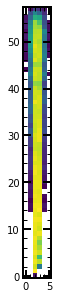

In [8]:
figure , axs = plt.subplots(1,1,figsize=[5,5])
# axs.imshow(matrix_ext_1_vertical[909]) # 131, 508, 686, 1166, 1610, 2769, 3224, 3493 indices para path con elip 0.85, Sol 0.7 
# axs.imshow(matrix_ext_2_vertical[1725])  # 56, 107, 133, 335, 587, 821, 884, 1206, 1454, 1926
axs.imshow(np.flip(matrix_ext_4_vertical[59], 0))  # 77, 1911, 2381, 2930 indices para path con elip 0.85, Sol 0.7
# axs.imshow(matrix_ext_1_horizontal[0])  # 77, 1911, 2381, 2930 indices para path con elip 0.85, Sol 0.7


# axs.imshow(np.flip(matrix_ext_1_horizontal[0], 1))
## 5, 6, 11, 20, 27, 30, 71, 72, 79, 83, 85, 92, 96, 97, 
plt.show()

[19029.7265625 70742.7265625 73955.7265625]


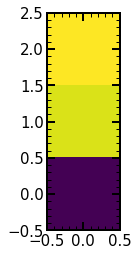

In [79]:
label_verticalMuon, nlabels_verticalMuon = ndimage.label(matrix_ext_1_horizontal[0],structure=[[0,1,0],[0,1,0],[0,1,0]])

label = 35
### Parte de abajo de la imagen ##
line = label_verticalMuon == label
# # print(Delta_inicial)
loc = ndimage.find_objects(label_verticalMuon == label)[0]
mask_35 = np.invert(label_verticalMuon == label)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])


print(data_mask.flatten())
plt.imshow(data_mask)
# plt.imshow(line)

In [7]:
list_index_long_muons = []

for index in np.arange(0, len(matrix_ext_4_vertical)):
    size_x = matrix_ext_4_vertical[index].shape[1]
    size_y = matrix_ext_4_vertical[index].shape[0]
    if size_y > 60:
        # print(size_x, size_y)
        list_index_long_muons.append(index)

# print(list_index_long_muons)+
print('Muones largos detectados: ', len(list_index_long_muons))
print('Indices: ', list_index_long_muons)

Muones largos detectados:  38
Indices:  [3, 5, 6, 11, 13, 19, 20, 22, 23, 24, 27, 28, 30, 32, 37, 39, 41, 42, 49, 53, 55, 57, 61, 62, 71, 72, 74, 77, 79, 83, 85, 87, 92, 93, 96, 97, 98, 99]


## Perfil Energético

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


149605.08 235439.22


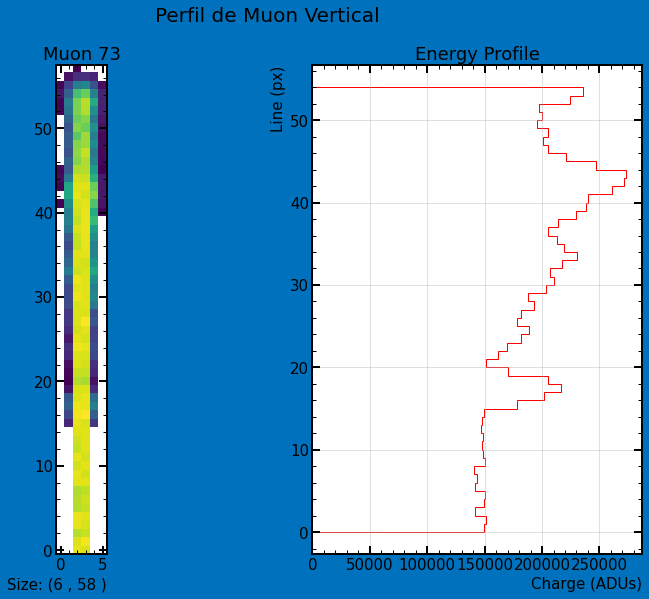

In [34]:
## Muons Extention 4
# muons_vertical_labels_1 = [[73], [3], [6], [14], [27]] #, 23,  27, 40, 43, 46, 49, 59, 85, 92, 94, 98] # Extensión 4

muon_label = 73  # Se coloca directamente el label del evento

Delta_inicial = 1
Delta_final = 3
extension = 4

fig, axs = plt.subplots(ncols=2, nrows=1, figsize = [13,9], facecolor = [0, 0.4470, 0.7410])
fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

# for event in matrix_ext_4_vertical[num:num + 1]:

# event = check_flip_vertical_muon(dict= data_histogram, label_muon=muon_label, Delta_in=Delta_inicial, Delta_fin=Delta_final, extension=extension)
event = matrix_ext_4_vertical[muon_label]
# plt.imshow(event)
size_x = event.shape[1] # tamaño en x
size_y = event.shape[0] # tamaño en y
# print(event.sum())

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

charge_verticalMuon = []
for lable_line in np.arange(Delta_inicial, nlabels_verticalMuon - Delta_final):
    line = label_verticalMuon == lable_line
    loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
    mask_35 = np.invert(label_verticalMuon == lable_line)
    data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
    # print(len(data_mask[0]))
    charge = data_mask.sum()
    # print(charge)
    mean_charge = data_mask.mean()

    charge_verticalMuon.append(charge)
    # print(charge)

## Linea inferior ##
# line_inf = [size_x]
# axs[0].imshow(data_mask)
print(charge_verticalMuon[0], charge_verticalMuon[-1])

axs[0].imshow(event)#, origin='upper')
axs[0].set_title('Muon ' + str(muon_label))
axs[0].set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
# x0bar = fig.colorbar(x0, ax=axs[0])

axs[1].stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', color = 'r')#,  hatch = '////')
# axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
axs[1].set_xlabel('Charge (ADUs)')
axs[1].set_ylabel('Line (px)')
# axs[1].set_ylim(0,len(event) - 1 )
axs[1].set_title('Energy Profile')
axs[1].legend()
axs[1].grid()
plt.show()

# Modelo de Difusión

## Ajuste de gaussiana de una linea

910.8222829198463


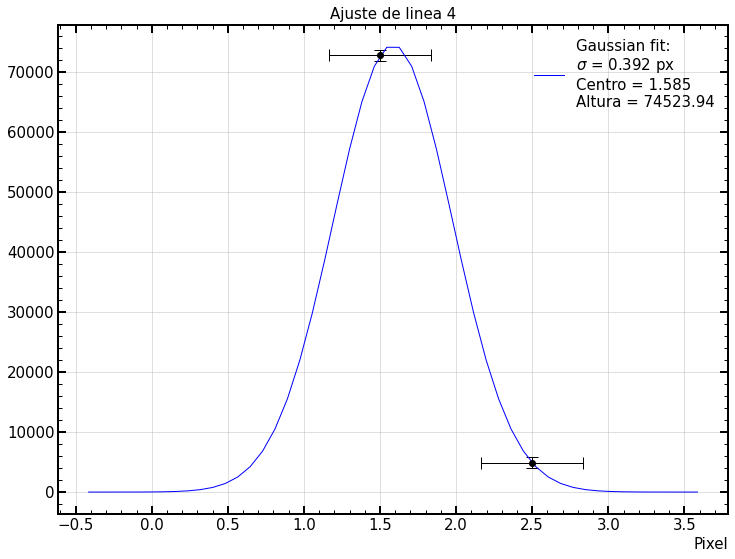

In [10]:
CCD_depth = 725 # micras
Delta_inicial = 3    # px
Delta_final = 6     # px

extension = 4
label_muon = 99
label_sigma = label_muon

img_sigma = matrix_ext_4_vertical_sigmas[label_sigma]
print(img_sigma)



## Se checa si el muon tiene la orientación correcta
event = check_flip_vertical_muon(dict  =  data_histogram, label_muon = label_muon, Delta_in= Delta_inicial, Delta_fin=Delta_final, extension=extension)

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

size_x = event.shape[1]
size_y = event.shape[0]

lines = 0
Longitud_XY = size_y 

Z_inicial = (Delta_inicial * CCD_depth) / (Longitud_XY - Delta_final)


lable_line = 4

## Enmascara la linea en turno
line = label_verticalMuon == lable_line
loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
mask_35 = np.invert(label_verticalMuon == lable_line)
data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])

Longitud_linea = len(data_mask[0])
Carga_renglon = data_mask[0].sum()
Mean_carga = np.mean(data_mask[0])

Mean_in  = 0
var = 0
carga_cuadrada = 0

### Se calcula el X promedio ##
for pixel in np.arange(0, Longitud_linea, 1):
    if data_mask[0][pixel]:
        element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
        Mean_in = Mean_in + element_pixel
    else:
        element_pixel = 0
    
    Mean_in = Mean_in + element_pixel

## Calcula la suma de las cargas al cuadrado ##
for pixel in np.arange(0, Longitud_linea, 1):
    if data_mask[0][pixel]:
        element_pixel = data_mask[0][pixel]**2
    else:
        element_pixel = 0

    carga_cuadrada = carga_cuadrada + element_pixel 

Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

### Se calcula la varianza ##
for pixel in np.arange(0, Longitud_linea, 1):
    element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in)**2
    var = var + element_pixel  ### COreggir la varianza con otro estimados

### Se corrige la varianza con la carga ###
var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))

### Se calcula la sigma ###
sigma_in = np.sqrt(var)
# sigma_in = np.sqrt(var_true)


##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
list_xlabel = np.arange(0.5, len(data_mask[0]), 1)

list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)

popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000, p0 = [8000, Mean_in, sigma_in])		# Fit histogram with gaussian

## Se guardan lo parámetros del ajuste en un diccionario ##
dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov}
Centroide = popt[1]
Sigma = abs(popt[2])
Altura = popt[0]

# print(Sigma)

# if Sigma > 6:
#     continue

# print(data_mask[0])

fig, axs_all = plt.subplots(figsize = [12,9])

# ## Se grafican los puntos experimentales ##
# axs_all.scatter(list_xlabel, data_mask[0], marker='.', color = 'k')  # 2D
# axs_all.scatter(list_xlabel_long, data_mask[0], lable_line, marker='.', color = 'k')  # 3D

for index_point in np.arange(0, len(list_xlabel)):
    try:
        axs_all.errorbar(x=list_xlabel[index_point], y=data_mask[0][index_point], xerr= 1/3, yerr=img_sigma, marker='o', color = 'k', ecolor='k', linestyle = ' ', capsize=6)
    except:
        continue

# ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
list_xlabel_long = np.linspace( Centroide - 2 , Centroide + 2)

axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), 'b', label = 'Gaussian fit: \n' +'$\sigma$ = ' + str(np.around(Sigma, 3)) + ' px \nCentro = ' + str(np.around(Centroide, 3)) + '\nAltura = '
                                                                                                + str(np.around(Altura, 2)))	# 2D
# axs_all.plot(list_xlabel_long, gaussian(list_xlabel_long, *popt), lable_line, 'k', label = r'Gaussian fit: $\sigma$ = ' + str(Sigma))	#3D
# axs_all.legend()


# fig.suptitle('Ajuste de linea ' + str(lable_line))
axs_all.set_title('Ajuste de linea ' + str(lable_line),  size = 15)#, y=0.92)
axs_all.set_xlabel('Pixel')
axs_all.grid()
axs_all.legend()


plt.show()

## Ajuste de difusión de algunos muones

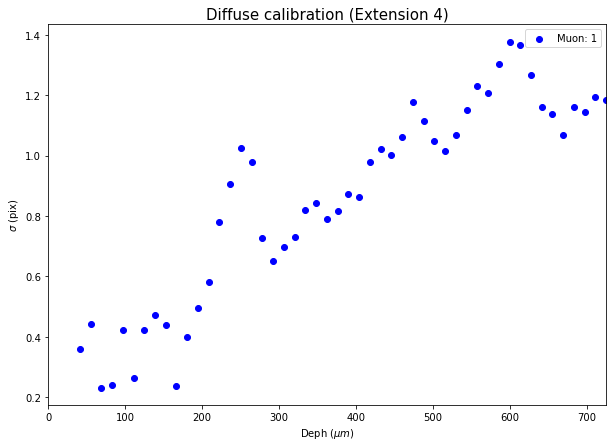

In [10]:
fig_2, axs_all_2 = plt.subplots(figsize = [10, 7])

Extension = 4

## Muons Extention 1
# muons_vertical_labels_1 = [[0], [1], [2], [4], [7]]

## Muons Extention 2
# muons_vertical_labels_1 = [[2], [5], [6], [16]]#, [31]] 

## Muons Extention 4
muons_vertical_labels_1 = [[73], [3], [6], [14], [27]] #, 23,  27, 40, 43, 46, 49, 59, 85, 92, 94, 98] # Extensión 4


list_all_sigmas_1, list_all_deeps_1 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_1[0], Delta_in=3, Delta_fin=5, extension=4)
list_all_sigmas_2, list_all_deeps_2 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_1[1], Delta_in=3, Delta_fin=5, extension=1)
list_all_sigmas_3, list_all_deeps_3 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_1[2], Delta_in=3, Delta_fin=5, extension=1)
list_all_sigmas_4, list_all_deeps_4 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_1[3], Delta_in=3, Delta_fin=5, extension=1)
# list_all_sigmas_5, list_all_deeps_5 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_1[4], Delta_in=5, Delta_fin=5, extension=1)


# axs_all_2.plot(list_all_deeps, list_all_sigmas, marker='o', color='k')#, label = 'Muon: ' + str(n_muon))
axs_all_2.scatter(list_all_deeps_1, list_all_sigmas_1, marker='o', color='b', label = 'Muon: 1')
# axs_all_2.scatter(list_all_deeps_2, list_all_sigmas_2, marker='v', color='r', label = 'Muon: 2')
# axs_all_2.scatter(list_all_deeps_3, list_all_sigmas_3, marker='^', color='g', label = 'Muon: 3')
# axs_all_2.scatter(list_all_deeps_4, list_all_sigmas_4, marker='<', color='m', label = 'Muon: 4')
# axs_all_2.scatter(list_all_deeps_5, list_all_sigmas_5, marker='>', color='orange', label = 'Muon: 5')


# axs_all_2.set_title('Diffuse calibration (Extension 1)', size = 15)#, y=0.92)}
# axs_all_2.set_title('Diffuse calibration (Extension 2)', size = 15)#, y=0.92)}
axs_all_2.set_title('Diffuse calibration (Extension 4)', size = 15)#, y=0.92)}
axs_all_2.set_ylabel(r'$\sigma$ (pix)')
axs_all_2.set_xlabel(r'Deph ($\mu m$)')
axs_all_2.set_xlim(0, 725)
axs_all_2.legend()
axs_all_2.grid

plt.show()



## Ajuste de la curva de difusión (por extensión)

Alpha:  5.433172429057344  Beta:  0.0003192831007724599
Alpha:  -1.8884460889073387  Beta:  0.0006731765778657127
Alpha:  11.42970735370812  Beta:  0.00017720103878022874


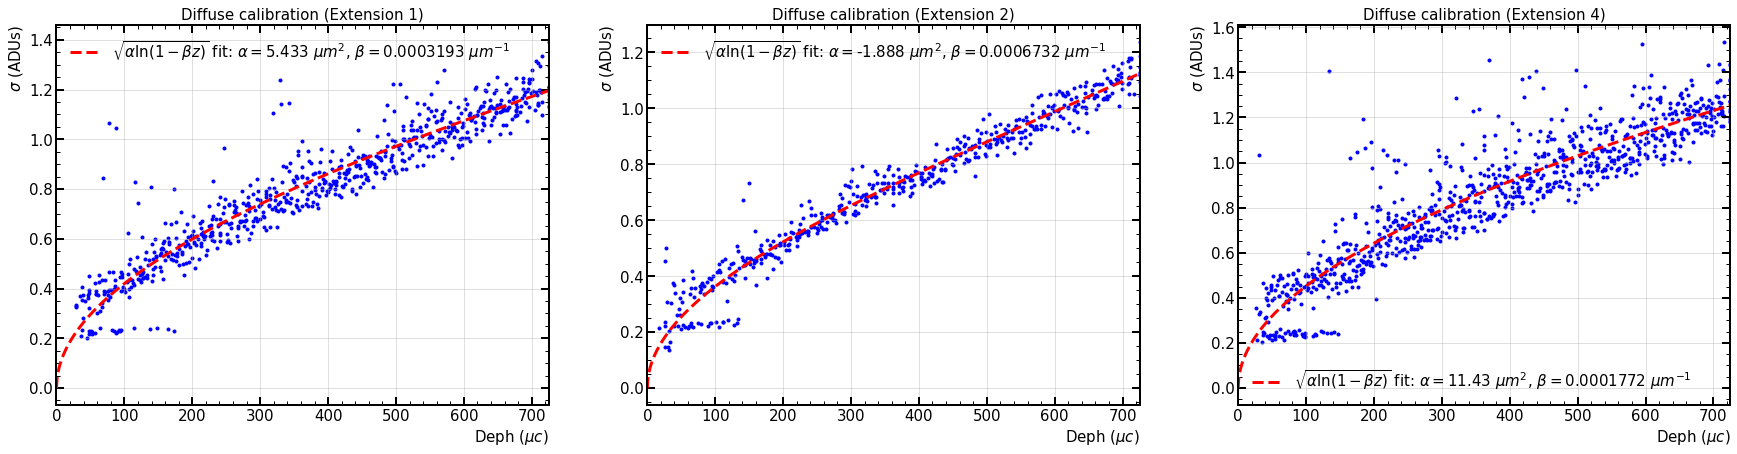

In [25]:
# fig_all, axs_all = plt.subplots(1, 2, figsize=(12, 6))
# fig, axs_all = plt.subplots( subplot_kw={"projection": "3d"}, figsize = [10,10])
fig_2, axs_all_2 = plt.subplots(1,3, figsize = [30, 7])

# Extension = 1
# muons_labels = [1,2, 3, 5, 8, 9, 15, 18, 33, 40]
# muons_labels = [1,2, 3, 5, 8, 9, 15, 18, 33, 51, 54, 63, 64] # Extensión 1


muons_vertical_labels_1 = [0, 1, 2, 4, 7, 8, 14, 17, 32, 50, 53, 62, 63] # Extensión 1
muons_vertical_labels_2 = [2, 5, 6, 16, 31, 32, 41, 44, 60, 72] # Extensión 2
muons_vertical_labels_4 = [2, 3, 6, 14, 16, 23, 27, 40, 43, 46, 49, 59, 85, 92, 94, 98] # Extensión 4


list_all_sigmas_1, list_all_deeps_1 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_1, Delta_in=3, Delta_fin=5, extension=1)
list_all_sigmas_2, list_all_deeps_2 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_2, Delta_in=2, Delta_fin=5, extension=2)
list_all_sigmas_4, list_all_deeps_4 = diffution_vertical_muon(dict = data_histogram, list_vertical_labels=muons_vertical_labels_4, Delta_in=3, Delta_fin=5, extension=4)

# list_all_sigmas = list_all_sigmas_1 + list_all_sigmas_2 + list_all_sigmas_4
# list_all_deeps = list_all_deeps_1 + list_all_deeps_2 + list_all_deeps_4

# axs_all_2.plot(list_all_deeps, list_all_sigmas, marker='o', color='k')#, label = 'Muon: ' + str(n_muon))
axs_all_2[0].scatter(list_all_deeps_1, list_all_sigmas_1, marker='.', color='b')#, label = 'Muon: ' + str(n_muon))
axs_all_2[1].scatter(list_all_deeps_2, list_all_sigmas_2, marker='.', color='b')#, label = 'Muon: ' + str(n_muon))
axs_all_2[2].scatter(list_all_deeps_4, list_all_sigmas_4, marker='.', color='b')#, label = 'Muon: ' + str(n_muon))


popt_DM_1, _ = curve_fit(diffution_curve, list_all_deeps_1, list_all_sigmas_1, maxfev=100000, p0= [100, 0.0001])
popt_DM_2, _ = curve_fit(diffution_curve, list_all_deeps_2, list_all_sigmas_2, maxfev=100000, p0= [100, 0.0001])
popt_DM_4, _ = curve_fit(diffution_curve, list_all_deeps_4, list_all_sigmas_4, maxfev=100000, p0= [100, 0.0001])


dict_diffution_model_1 = {'Alpha' : popt_DM_1[0], 'Beta' : popt_DM_1[1]}
dict_diffution_model_2 = {'Alpha' : popt_DM_2[0], 'Beta' : popt_DM_2[1]}
dict_diffution_model_4 = {'Alpha' : popt_DM_4[0], 'Beta' : popt_DM_4[1]}


print('Alpha: ', dict_diffution_model_1['Alpha'], ' Beta: ', dict_diffution_model_1['Beta'])
print('Alpha: ', dict_diffution_model_2['Alpha'], ' Beta: ', dict_diffution_model_2['Beta'])
print('Alpha: ', dict_diffution_model_4['Alpha'], ' Beta: ', dict_diffution_model_4['Beta'])

fit_range = np.arange(0, 725)
axs_all_2[0].plot(fit_range, diffution_curve(fit_range, *popt_DM_1), '--r', linewidth = 3, label = r'$\sqrt{\alpha \ln (1 - \beta z)}$ fit: $\alpha = $'  + str( np.round(dict_diffution_model_1['Alpha'], 3)) + 
                                                                                                    r' $\mu m^2$, $\beta = $' + str( np.round(dict_diffution_model_1['Beta'], 7)) + r' $ \mu m ^{-1}$')
axs_all_2[1].plot(fit_range, diffution_curve(fit_range, *popt_DM_2), '--r', linewidth = 3, label = r'$\sqrt{\alpha \ln (1 - \beta z)}$ fit: $\alpha = $'  + str( np.round(dict_diffution_model_2['Alpha'], 3)) + 
                                                                                                    r' $\mu m^2$, $\beta = $' + str( np.round(dict_diffution_model_2['Beta'], 7)) + r' $ \mu m ^{-1}$')
axs_all_2[2].plot(fit_range, diffution_curve(fit_range, *popt_DM_4), '--r', linewidth = 3, label = r'$\sqrt{\alpha \ln (1 - \beta z)}$ fit: $\alpha = $'  + str( np.round(dict_diffution_model_4['Alpha'], 3)) + 
                                                                                                    r' $\mu m^2$, $\beta = $' + str( np.round(dict_diffution_model_4['Beta'], 7)) + r' $ \mu m ^{-1}$')



axs_all_2[0].set_title('Diffuse calibration (Extension 1)', size = 15)#, y=0.92)}
axs_all_2[0].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[0].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[0].set_xlim(0, 725)
axs_all_2[0].legend()
axs_all_2[0].grid()

axs_all_2[1].set_title('Diffuse calibration (Extension 2)', size = 15)#, y=0.92)}
axs_all_2[1].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[1].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[1].set_xlim(0, 725)
axs_all_2[1].legend()
axs_all_2[1].grid()

axs_all_2[2].set_title('Diffuse calibration (Extension 4)', size = 15)#, y=0.92)}
axs_all_2[2].set_ylabel(r'$\sigma$ (ADUs)')
axs_all_2[2].set_xlabel(r'Deph ($\mu c$)')
axs_all_2[2].set_xlim(0, 725)
axs_all_2[2].legend()
axs_all_2[2].grid()

plt.show()



### Ajuste de la extensión 1 y 4 

Alpha:  7.964419892266332  Beta:  0.00023793112280021732


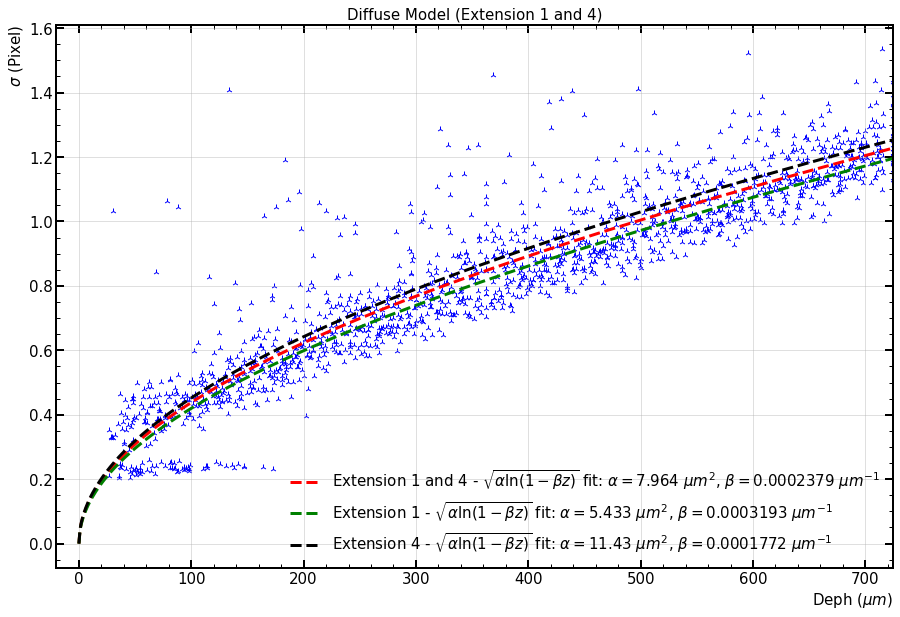

In [54]:
all_sigmas_ext_1_4 = list_all_sigmas_1 + list_all_sigmas_4
all_deeps_ext_1_4 = list_all_deeps_1 + list_all_deeps_4


popt_DM, _ = curve_fit(diffution_curve, all_deeps_ext_1_4, all_sigmas_ext_1_4, maxfev=100000, p0= [100, 0.0001])
dict_diffution_model = {'Alpha' : popt_DM[0], 'Beta' : popt_DM[1]}
print('Alpha: ', dict_diffution_model['Alpha'], ' Beta: ', dict_diffution_model['Beta'])

fig_2, axs_all_2 = plt.subplots(figsize = [15, 10])

axs_all_2.scatter(all_deeps_ext_1_4, all_sigmas_ext_1_4, marker='2', color='b')#, label = 'Muon: ' + str(n_muon))

fit_range = np.arange(0, 725)
axs_all_2.plot(fit_range, diffution_curve(fit_range, *popt_DM), '--r', linewidth = 3, label = r'Extension 1 and 4 - $\sqrt{\alpha \ln (1 - \beta z)}$ fit: $\alpha = $'  + str( np.round(dict_diffution_model['Alpha'], 3)) + 
                                                                                                    r' $\mu m^2$, $\beta = $' + str( np.round(dict_diffution_model['Beta'], 7)) + r' $ \mu m ^{-1}$')

axs_all_2.plot(fit_range, diffution_curve(fit_range, *popt_DM_1), '--g', linewidth = 3, label = r'Extension 1 - $\sqrt{\alpha \ln (1 - \beta z)}$ fit: $\alpha = $'  + str( np.round(dict_diffution_model_1['Alpha'], 3)) + 
                                                                                                    r' $\mu m^2$, $\beta = $' + str( np.round(dict_diffution_model_1['Beta'], 7)) + r' $ \mu m ^{-1}$')
axs_all_2.plot(fit_range, diffution_curve(fit_range, *popt_DM_4), '--k', linewidth = 3, label = r'Extension 4 - $\sqrt{\alpha \ln (1 - \beta z)}$ fit: $\alpha = $'  + str( np.round(dict_diffution_model_4['Alpha'], 3)) + 
                                                                                                    r' $\mu m^2$, $\beta = $' + str( np.round(dict_diffution_model_4['Beta'], 7)) + r' $ \mu m ^{-1}$')


axs_all_2.set_title('Diffuse Model (Extension 1 and 4)', size = 15)#, y=0.92)}
axs_all_2.set_ylabel(r'$\sigma$ (Pixel)')
axs_all_2.set_xlabel(r'Deph ($\mu m$)')
axs_all_2.set_xlim(-20, 725)
axs_all_2.legend()
axs_all_2.grid()

plt.show()

# Visualizar Muones en PDF de una sola extensión y tipo

In [48]:
sample_horizontal = []
for index in (3, 31, 77, 617, 660, 792, 862, 1911, 2381, 2930):
    sample_horizontal.append(matrix_ext_4_vertical[index])

In [20]:
list_path = path.split('_')
print(list_path)
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

['/home/bruce/Documents/Programas/Catalogo', 'Eventos/dict', '', 'straight', 'muons', 'Extensions', '1', 'to', '4', 'Imgs', '2078', 'Elip', '0', 'Sol', '0.7', 'ADUs', '', '.pkl']


In [49]:
### Nombre del PDF ###
extension = 4
list_path = path.split('_')
Elip_value = float(list_path[12])
Solidit_value = float(list_path[14])
Charge_units = list_path[15]

PDF_images_name = "Muones-Verticales_Ext_" + str(extension) + "_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 
# PDF_images_name = 
# PDF_images_name = "Muones-Horizontales_Ext_" + str(extension) + "_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
color_matrix = [0.4, 0.4470, 0.2410]
# list_n_vertical = []
# list_n_events = []

n_events = 0
coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
w, h = A4 ## dimensiones del formato
num_pages = 0
c.showPage()
n_last_events = 0

# for extension in (1,2,4):
c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
# n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
n_vertical = len(sample_horizontal)
# n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
n_last_events = 0
n_events = 0
# print(n_vertical % 9 != 0)

if (n_vertical%9) == 0:
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        # print('n_vertical: ', n_vertical)
        if n_events < 10: 
            # print('n_events: ', n_events)
            charge = event.sum()
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
            axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))

            if n_events == 9:
                n_events = 10

        if n_events == 10:
            n_events = 0
            num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

if (n_vertical%9) != 0:
    Resto = n_vertical%9
    # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
    for event in sample_horizontal:
        n_vertical = n_vertical - 1
        n_events = n_events + 1
        # list_n_vertical.append(n_vertical)
        # list_n_events.append(n_events)
        # print('n_events: ', n_events)
        # print('n_vertical: ', n_vertical)

        if n_vertical >= Resto:
            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages) + '.a')
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

        if  n_vertical < Resto:
            n_last_events = n_last_events + 1
            # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
            # print('n_vertical: ', n_vertical)
            # print('n_last_events: ', n_last_events)
            charge = event.sum()
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
            axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))

            if n_vertical == 0:
                # plt.show()
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)




plt.close()
c.save()

## Visualizar en PDF TODOS los muones encontrados 

In [15]:
list_path = path.split('_')
Elip_value = float(list_path[14])
Solidit_value = float(list_path[16])
Charge_units = list_path[17]


# print(list_path[16])

0.7


In [ ]:
##### SOLO CORRER ESTA CELDA SI EL NÚMERO DE EVENTOS NO ES MUY GRANDE O EL PROCESO SERÁ DEMASIADO TARDADO #####

### Nombre del PDF ###
# extension = 1
list_path = path.split('_')
Elip_value = float(list_path[14])
Solidit_value = float(list_path[16])
Charge_units = list_path[17]


color_matrix = [0.6, 0.4470, 0.2410] ## ALgo café

PDF_images_name = "Muones-Rectos_Elip_" + str(Elip_value) + "_Sol_" + str(Solidit_value) + '_Units_' + str(Charge_units) + '.pdf' 

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
num_pages = 0

# list_n_vertical = []
# list_n_events = []
for extension in (1,2,4):
    coord3x3 = [[0,0],[0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
    w, h = A4 ## dimensiones del formato
    c.showPage()

    # for extension in (1,2,4):
    c.drawString(50, h - 50, 'Extensión ' + str(extension)) 
    # n_vertical = len(dict_muons_true['extension_' +str(extension)]['Vertical_Events'])
    n_vertical = len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
    n_horizontal = len(data_histogram['extension_' + str(extension)]['Horizontal_Events'])

    # n_vertical = len(data_histogram['extension_' + str(extension)]['Horizontal_Events']) + len(data_histogram['extension_' + str(extension)]['Vertical_Events'])
    n_last_events = 0
    n_events = 0
    # print(n_vertical % 9 != 0)
    n_label = 0
    
    if (n_vertical%9) == 0:
        # n_label = 1
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Vertical_Events']:
            n_vertical = n_vertical - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Label: ' + str(n_label))

                n_label = n_label + 1

                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

    if (n_vertical%9) != 0:
        Resto = n_vertical%9
        # print(Resto)

        # n_label = 1
        
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Vertical_Events']:
            n_vertical = n_vertical - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            if n_vertical >= Resto:
                # print('n_vertical: ', n_vertical)
                if n_events < 10: 
                    # print('n_events: ', n_events)
                    charge = event.sum()
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                    # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_ylabel('Label: ' + str(n_label))
                    n_label = n_label + 1
                    if n_events == 9:
                        n_events = 10

                if n_events == 10:
                    n_events = 0
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

                    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

            if  n_vertical < Resto:
                # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
                # print('n_vertical: ', n_vertical)
                # print('n_last_events: ', n_last_events)
                n_last_events = n_last_events + 1

                charge = event.sum()
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
                # axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_ylabel('Charge: ' + str(charge))
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_ylabel('Label: ' + str(n_label))
                n_label =  n_label + 1

                if n_vertical == 0:
                    # plt.show()
                    # print('Estoy cuando n_vertical es 0')
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

    n_last_events = 0
    n_events = 0

    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix) ## Las hojas tendrán 9 muones
    n_label = 0

    if (n_horizontal%9) == 0:
        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Horizontal_Events']:
            n_horizontal = n_horizontal - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            # print('n_vertical: ', n_vertical)
            if n_events < 10: 
                # print('n_events: ', n_events)
                charge = event.sum()
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Label: ' + str(n_label))
                n_label = n_label + 1

                if n_events == 9:
                    n_events = 10

            if n_events == 10:
                n_events = 0
                num_pages = num_pages + 1
                fig.savefig(path_image)
                img = ImageReader(path_image)

                # Obtener el ancho y alto de la imagen.
                img_w, img_h = img.getSize()

                # h - img_h es el alto de la hoja menos el alto de la imagen.
                c.drawImage(img, w - img_w + 50, h - img_h - 60)
                c.drawString(w/2, 40, str(num_pages))
                c.showPage()
                # plt.imshow(event)
                # plt.show()
                plt.close()
                ! rm Perfil_Muon.jpg

                fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

    if (n_horizontal%9) != 0:
        Resto = n_horizontal%9

        # for event in dict_muons_true['extension_' +str(extension)]['Vertical_Events']:
        for event in data_histogram['extension_' + str(extension)]['Horizontal_Events']:
            n_horizontal = n_horizontal - 1
            n_events = n_events + 1
            # list_n_vertical.append(n_vertical)
            # list_n_events.append(n_events)
            # print('n_events: ', n_events)
            # print('n_vertical: ', n_vertical)

            if n_horizontal >= Resto:
                # print('n_vertical: ', n_vertical)
                if n_events < 10: 
                    # print('n_events: ', n_events)
                    charge = event.sum()
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].imshow(event)
                    # axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                    axs[coord3x3[n_events - 1][0],coord3x3[n_events - 1][1]].set_xlabel('Label: ' + str(n_label))
                    n_label = n_label + 1

                    if n_events == 9:
                        n_events = 10

                if n_events == 10:
                    n_events = 0
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg

                    fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = color_matrix)

            if  n_horizontal < Resto:
                n_last_events = n_last_events + 1
                # fig, axs = plt.subplots(ncols= 3, nrows= 3, figsize = [10,10], facecolor = [0, 0.4470, 0.7410])
                # print('n_vertical: ', n_vertical)
                # print('n_last_events: ', n_last_events)
                charge = event.sum()
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].imshow(event)
                # axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Charge: ' + str(charge))
                axs[coord3x3[n_last_events - 1][0],coord3x3[n_last_events - 1][1]].set_xlabel('Label: ' + str(n_label))

                n_label = n_label + 1

                if n_horizontal == 0:
                    # plt.show()
                    num_pages = num_pages + 1
                    fig.savefig(path_image)
                    img = ImageReader(path_image)

                    # Obtener el ancho y alto de la imagen.
                    img_w, img_h = img.getSize()

                    # h - img_h es el alto de la hoja menos el alto de la imagen.
                    c.drawImage(img, w - img_w + 50, h - img_h - 60)
                    c.drawString(w/2, 40, str(num_pages))
                    c.showPage()
                    # plt.imshow(event)
                    # plt.show()
                    plt.close()
                    ! rm Perfil_Muon.jpg




plt.close()
c.save()


## PDF de perfil energético con ajustes gaussianos para un muon

In [23]:
muon_label = 40  # Se coloca directamente el label del evento

CCD_depth = 725 # micras
Delta_inicial = 3
Delta_final = 6
extension = 4
Sigmas_ADUs = data_histogram['extension_' + str(extension)]['vertical_sigmas']


PDF_images_name = "Deffuse_model_for_one_muon.pdf"

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)
w, h = A4 ## dimensiones del formato
# c.showPage()

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
num_pages = 0

color_matrix = [0.6, 0.4470, 0.2410] ## ALgo café
# color_matrix = [0, 0.4470, 0.7410]  ## Azul
# coord3x2 = [[0,0],[0,1], [1,0], [1,1], [2,0], [2,1]]
coord3x2 =  [[0,0],[0,1], [1,0], [1,1]]


# fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)


event = check_flip_vertical_muon(dict= data_histogram, label_muon=muon_label, Delta_in=Delta_inicial, Delta_fin=Delta_final, extension=extension)

# for event in matrix_ext_4_vertical[num:num + 1]:
# plt.imshow(event)
size_x = event.shape[1] # tamaño en x
size_y = event.shape[0] # tamaño en y

label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

charge_verticalMuon = []
list_dicts_popt = []

num_lines_true = range(Delta_inicial, nlabels_verticalMuon - Delta_final)
print('Num de lineas: ', len(num_lines_true))

Longitud_XY = size_y 

Z_inicial = (Delta_inicial * CCD_depth) / (Longitud_XY - Delta_final)

for lable_line in range(Delta_inicial, nlabels_verticalMuon - Delta_final):
    line = label_verticalMuon == lable_line
    loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
    mask_35 = np.invert(label_verticalMuon == lable_line)
    data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
    
    
    charge = data_mask[0].sum()
    mean_charge = data_mask.mean()    

    charge_verticalMuon.append(charge)
    # print(charge)

    ### ------------------------------ PAra abajo es lo del as gaussianas y el modelo de difusión --------------------- ###
    Longitud_linea = len(data_mask[0])
    Carga_renglon = data_mask[0].sum()
    Mean_carga = np.mean(data_mask[0])

    Mean_in  = 0
    var = 0
    carga_cuadrada = 0

    ### Se calcula el X promedio ##
    for pixel in np.arange(0, Longitud_linea, 1):
        if data_mask[0][pixel]:
            element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
            Mean_in = Mean_in + element_pixel
        else:
            element_pixel = 0
        
        Mean_in = Mean_in + element_pixel

    ## Calcula la suma de las cargas al cuadrado ##
    for pixel in np.arange(0, Longitud_linea, 1):
        if data_mask[0][pixel]:
            element_pixel = data_mask[0][pixel]**2
        else:
            element_pixel = 0

        carga_cuadrada = carga_cuadrada + element_pixel 

    Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

    ### Se calcula la varianza ##
    for pixel in np.arange(0, Longitud_linea, 1):
        element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in)**2
        var = var + element_pixel  ### COreggir la varianza con otro estimados

    ### Se corrige la varianza con la carga ###
    var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))

    ### Se calcula la sigma ###
    sigma_in = np.sqrt(var)
    # sigma_in = np.sqrt(var_true)


    ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
    list_xlabel = np.arange(0.5, len(data_mask[0]), 1)

    list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)

    popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000, p0 = [10000, Mean_in, sigma_in])		# Fit histogram with gaussian

    ## Se guardan lo parámetros del ajuste en un diccionario ##
    dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov, 'Points' : data_mask[0], 'Xlabel' : list_xlabel}

    list_dicts_popt.append(dict_popt)

list_xlabel_sigmas = np.linspace(Z_inicial, CCD_depth, len(list_dicts_popt))



list_all_sigmas = []
for index in range(0, len(list_dicts_popt)):
    list_all_sigmas.append(list_dicts_popt[index]['sigma'])


### Figura del muon, perfil de energía y modelo de difusión 

fig = plt.figure(figsize=[8,9])
axs1 = plt.subplot(221)
axs2 = plt.subplot(222)
axs3 = plt.subplot(212)


axs1.imshow(event)
axs1.set_title('Muon ' + str(muon_label))
axs1.set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
# x0bar = fig.colorbar(x0, ax=axs[0])

axs2.stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', hatch = '////', color = 'r')
# axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
axs2.set_xlabel('Charge (ADUs)')
axs2.set_ylabel('Line (px)')
# axs[1].set_ylim(0,len(event) - 1 )
axs2.set_title('Energy Profile')
# axs[1].legend()
axs2.grid()


axs3.scatter(list_xlabel_sigmas, list_all_sigmas, marker='^', color='g', label = 'Muon: ' + str(muon_label))
axs3.set_xlabel(r'Deep ($\mu m$)')
axs3.set_ylabel(r'$\sigma$ (px)')
axs3.set_title('Diffuse Data ')
axs3.grid()

plt.tight_layout()
fig.savefig(path_image)
img = ImageReader(path_image)

# Obtener el ancho y alto de la imagen.
img_w, img_h = img.getSize()

# h - img_h es el alto de la hoja menos el alto de la imagen.
c.drawImage(img, w - img_w + 0, h - img_h - 60)
c.drawString(w/2, 40, str(num_pages))
c.showPage()
# plt.imshow(event)
# plt.show()
plt.close()
! rm Perfil_Muon.jpg  ## Borra la imagen auxiliar

n_events = 0
n_lines = len(num_lines_true)

if (n_lines%6) == 0:
    # fig, axs_all = plt.subplots(3,2, figsize = [9,12], facecolor = color_matrix)
    fig, axs_all = plt.subplots(2,2, figsize = [9,12], facecolor = color_matrix)
    # fig = plt.figure(figsize=[8,9])
    # axs1 = plt.subplot(321)
    # axs2 = plt.subplot(322)
    # axs3 = plt.subplot(323)
    # axs3 = plt.subplot(323)

    for index in np.arange(0, len(list_dicts_popt)):

        if n_events < 5:
            Centroide = list_dicts_popt[index]['Mean']
            Altura = list_dicts_popt[index]['Hight']
            Sigma = list_dicts_popt[index]['sigma']
            Points = list_dicts_popt[index]['Points']
            list_xlabel = list_dicts_popt[index]['Xlabel']
            n_events = n_events + 1
            # print(Sigma)

            for index_point in np.arange(0, len(list_xlabel)):
                try:
                    axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].errorbar(x=list_xlabel[index_point], y=Points[index_point], xerr= 1/3, yerr= Sigmas_ADUs[muon_label], marker='o', color = 'k', ecolor='k', linestyle = ' ', capsize=6)
                except:
                    continue

            # ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
            list_xlabel_long = np.linspace( Centroide - 3 , Centroide + 3) # gaussian(x, a, mean, sigma)
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].plot(list_xlabel_long, gaussian(list_xlabel_long, a = Altura, mean= Centroide, sigma= Sigma), 
                                    'b', label = 'Gaussian fit: \n' +'$\sigma$ = ' + str(np.around(Sigma, 3)) + ' px \nCentro = ' + str(np.around(Centroide, 3)) + '\nAltura = ' + str(np.around(Altura, 2)))

            # axs_all.legend()

            # fig.suptitle('Ajuste de linea ' + str(lable_line))
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].set_title('Fit in line ' + str(index + 1),  size = 15)#, y=0.92)
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].set_xlabel('Pixel')
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].grid()
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].legend()

            n_lines = n_lines - 1

            # plt.close()
            if n_events == 4:
                n_events = 5
        
        if n_events == 5:
            n_events = 0
            # num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            # fig, axs_all = plt.subplots(3, 2, figsize = [9,12], facecolor = color_matrix)
            fig, axs_all = plt.subplots(2, 2, figsize = [9,12], facecolor = color_matrix)

        
if (n_lines%6) != 0:
    # fig, axs_all = plt.subplots(3,2, figsize = [9,12], facecolor = color_matrix)
    fig, axs_all = plt.subplots(2,2, figsize = [9,12], facecolor = color_matrix)
    # fig = plt.figure(figsize=[8,9])
    # axs1 = plt.subplot(321)
    # axs2 = plt.subplot(322)
    # axs3 = plt.subplot(323)
    # axs3 = plt.subplot(323)

    for index in np.arange(0, len(list_dicts_popt)):

        if n_events < 5:
            Centroide = list_dicts_popt[index]['Mean']
            Altura = list_dicts_popt[index]['Hight']
            Sigma = list_dicts_popt[index]['sigma']
            Points = list_dicts_popt[index]['Points']
            list_xlabel = list_dicts_popt[index]['Xlabel']

            n_events = n_events + 1
            # print(Sigma)
            
            for index_point in np.arange(0, len(list_xlabel)):
                try:
                    axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].errorbar(x=list_xlabel[index_point], y=Points[index_point], xerr= 1/3, yerr= Sigmas_ADUs[muon_label], marker='o', color = 'k', ecolor='k', linestyle = ' ', capsize=6)
                except:
                    continue

            # ## Se crea otro arreglo para el plot del ajusto y se dibuja ##
            list_xlabel_long = np.linspace( Centroide - 2 , Centroide + 2) # gaussian(x, a, mean, sigma)
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].plot(list_xlabel_long, gaussian(list_xlabel_long, a = Altura, mean= Centroide, sigma= Sigma), 
                                    'b', label = 'Gaussian fit: \n' +'$\sigma$ = ' + str(np.around(Sigma, 3)) + ' px \nCentro = ' + str(np.around(Centroide, 3)) + '\nAltura = ' + str(np.around(Altura, 2)))

            # axs_all.legend()

            # fig.suptitle('Ajuste de linea ' + str(lable_line))
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].set_title('Fit in line ' + str(index + 1),  size = 15)#, y=0.92)
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].set_xlabel('Pixel')
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].grid()
            axs_all[coord3x2[n_events - 1][0],coord3x2[n_events - 1][1]].legend()

            n_lines = n_lines - 1

            # plt.close()
            if n_events == 4:
                n_events = 5
        
        if n_events == 5:
            n_events = 0
            # num_pages = num_pages + 1
            fig.savefig(path_image)
            img = ImageReader(path_image)

            # Obtener el ancho y alto de la imagen.
            img_w, img_h = img.getSize()

            # h - img_h es el alto de la hoja menos el alto de la imagen.
            c.drawImage(img, w - img_w + 50, h - img_h - 60)
            c.drawString(w/2, 40, str(num_pages))
            c.showPage()
            # plt.imshow(event)
            # plt.show()
            plt.close()
            ! rm Perfil_Muon.jpg

            # fig, axs_all = plt.subplots(3, 2, figsize = [9,12], facecolor = color_matrix)
            fig, axs_all = plt.subplots(2, 2, figsize = [9,12], facecolor = color_matrix)

        
plt.close()
c.save()




Num de lineas:  43


## PDF de perfil energético para todos los muones

In [12]:
# muon_label = 40  # Se coloca directamente el label del evento
list_lebel_muon = [0, 1, 2, 4, 7, 8, 14, 17, 32, 50, 53, 62, 63] # Extensión 1
# list_lebel_muon = [2, 5, 6, 16, 31, 32, 41, 44, 60, 72] # Extensión 2
# list_lebel_muon = [2, 3, 6, 14, 16, 23, 27, 40, 43, 46, 49, 59, 85, 92, 94, 98] # Extensión 4

CCD_depth = 725 # micras
Delta_inicial = 4
Delta_final = 6
extension = 1

Sigmas_ADUs = data_histogram['extension_' + str(extension)]['vertical_sigmas']


PDF_images_name = "Energy_per_slice_&_defuse_model_Extension_" + str(extension) + ".pdf"

### Creación del PDF con el nombre ##
c = canvas.Canvas(PDF_images_name)
w, h = A4 ## dimensiones del formato
# c.showPage()

### Imagen provicional ###
path_image = 'Perfil_Muon.jpg'
num_pages = 1

color_matrix = [0.6, 0.4470, 0.2410] ## ALgo café
# color_matrix = [0, 0.4470, 0.7410]  ## Azul
# coord3x2 = [[0,0],[0,1], [1,0], [1,1], [2,0], [2,1]]
coord3x2 =  [[0,0],[0,1], [1,0], [1,1]]


# fig.suptitle('Perfil de Muon Vertical', y = 0.97, size = 20)

for label_muon in list_lebel_muon:
    event, flag_turn = check_flip_vertical_muon(dict= data_histogram, label_muon=label_muon, Delta_in=Delta_inicial, Delta_fin=Delta_final, extension=extension)

    # for event in matrix_ext_4_vertical[num:num + 1]:
    # plt.imshow(event)
    size_x = event.shape[1] # tamaño en x
    size_y = event.shape[0] # tamaño en y

    label_verticalMuon, nlabels_verticalMuon = ndimage.label(event,structure=[[0,0,0],[1,1,1],[0,0,0]])

    charge_verticalMuon = []
    list_dicts_popt = []

    num_lines_true = range(Delta_inicial, nlabels_verticalMuon - Delta_final)
    # print('Num de lineas: ', len(num_lines_true))

    Longitud_XY = size_y 

    Z_inicial = (Delta_inicial * CCD_depth) / (Longitud_XY - Delta_final)

    for lable_line in range(Delta_inicial, nlabels_verticalMuon - Delta_final):
        line = label_verticalMuon == lable_line
        loc = ndimage.find_objects(label_verticalMuon == lable_line)[0]
        mask_35 = np.invert(label_verticalMuon == lable_line)
        data_mask = ma.masked_array(event[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop], mask_35[loc[0].start:loc[0].stop, loc[1].start:loc[1].stop])
        
        
        charge = data_mask[0].sum()
        mean_charge = data_mask.mean()    

        charge_verticalMuon.append(charge)
        # print(charge)

        ### ------------------------------ PAra abajo es lo del as gaussianas y el modelo de difusión --------------------- ###
        Longitud_linea = len(data_mask[0])
        Carga_renglon = data_mask[0].sum()
        Mean_carga = np.mean(data_mask[0])

        Mean_in  = 0
        var = 0
        carga_cuadrada = 0

        ### Se calcula el X promedio ##
        for pixel in np.arange(0, Longitud_linea, 1):
            if data_mask[0][pixel]:
                element_pixel = (pixel * data_mask[0][pixel]) / Carga_renglon
                Mean_in = Mean_in + element_pixel
            else:
                element_pixel = 0
            
            Mean_in = Mean_in + element_pixel

        ## Calcula la suma de las cargas al cuadrado ##
        for pixel in np.arange(0, Longitud_linea, 1):
            if data_mask[0][pixel]:
                element_pixel = data_mask[0][pixel]**2
            else:
                element_pixel = 0

            carga_cuadrada = carga_cuadrada + element_pixel 

        Mean_carga_cuadrada = carga_cuadrada/Longitud_linea

        ### Se calcula la varianza ##
        for pixel in np.arange(0, Longitud_linea, 1):
            element_pixel =(1 / (Longitud_linea - 1)) * (pixel - Mean_in)**2
            var = var + element_pixel  ### COreggir la varianza con otro estimados

        ### Se corrige la varianza con la carga ###
        var_true = var * (Mean_carga_cuadrada / (Mean_carga**2))

        ### Se calcula la sigma ###
        sigma_in = np.sqrt(var)
        # sigma_in = np.sqrt(var_true)


        ##Se crea un arreglo para usarlo en el plot de los datos, y se realiza el juste ##
        list_xlabel = np.arange(0.5, len(data_mask[0]), 1)

        list_xlabel_long = np.linspace(-Longitud_linea + int(Longitud_linea/2) , Longitud_linea + int(Longitud_linea/2), Longitud_linea)

        popt, pcov = curve_fit(gaussian, list_xlabel, data_mask[0], maxfev=100000, p0 = [10000, Mean_in, sigma_in])		# Fit histogram with gaussian

        ## Se guardan lo parámetros del ajuste en un diccionario ##
        dict_popt = {'Mean' : popt[1], 'Hight' : popt[0], 'sigma' : abs(popt[2]), 'Pcov' : pcov, 'Points' : data_mask[0], 'Xlabel' : list_xlabel}

        list_dicts_popt.append(dict_popt)

    list_xlabel_sigmas = np.linspace(Z_inicial, CCD_depth, len(list_dicts_popt))



    list_all_sigmas = []
    for index in range(0, len(list_dicts_popt)):
        list_all_sigmas.append(list_dicts_popt[index]['sigma'])


    ### Figura del muon, perfil de energía y modelo de difusión 

    fig = plt.figure(figsize=[8,9])
    axs1 = plt.subplot(231)
    axs2 = plt.subplot(232)
    axs4 = plt.subplot(233)
    axs3 = plt.subplot(212)

    ### Image muon ###
    axs1.imshow(data_histogram['extension_' + str(extension)]['Vertical_Events'][label_muon])
    axs1.set_title('Muon ' + str(label_muon))
    axs1.set_xlabel('Size: (' + str(size_x) + ' , ' + str(size_y) + ' )')
    # x0bar = fig.colorbar(x0, ax=axs[0])

    # reverse_list = charge_verticalMuon[::-1]
    # print(reverse_list)

    # print(charge_verticalMuon)

    if flag_turn:
        ### Energy profile ##
        axs2.stairs(charge_verticalMuon[::-1], np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', color = 'r')#, hatch = '////')
        # axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
        axs2.set_xlabel('Charge (ADUs)')
        axs2.set_ylabel('Line (px)')
        # axs[1].set_ylim(0,len(event) - 1 )
        axs2.set_title('Energy per Slice')
        # axs[1].legend()
        axs2.grid()

        ## Sigma Profile ##
        axs4.stairs(list_all_sigmas[::-1], np.arange(0,len(charge_verticalMuon)+1), orientation = 'horizonral', color='r')
        axs4.set_xlabel(r'$\sigma$ (px)')
        axs4.set_ylabel('Line (px)')
        # axs[1].set_ylim(0,len(event) - 1 )
        axs4.set_title('Sigma per Slice')
        # axs[1].legend()
        axs4.grid()

        ## Deffuse Model ##
        axs3.scatter(list_xlabel_sigmas, list_all_sigmas, marker='^', color='g', label = 'Muon: ' + str(label_muon))
        axs3.set_xlabel(r'Deep ($\mu m$)')
        axs3.set_ylabel(r'$\sigma$ (px)')
        # axs3.set_title('Diffuse Data ')
        axs3.grid()


        plt.tight_layout()
        fig.savefig(path_image)
        img = ImageReader(path_image)

        # Obtener el ancho y alto de la imagen.
        img_w, img_h = img.getSize()

        # h - img_h es el alto de la hoja menos el alto de la imagen.
        c.drawImage(img, w - img_w + 0, h - img_h - 60)
        c.drawString(w/2, 40, str(num_pages))
        c.showPage()
        # plt.imshow(event)
        # plt.show()
        plt.close()
        ! rm Perfil_Muon.jpg  ## Borra la imagen auxiliar

        num_pages = num_pages + 1

    else:
        ### Energy profile ##
        axs2.stairs(charge_verticalMuon, np.arange(0,len(charge_verticalMuon)+1),  orientation='horizontal', color = 'r')#, hatch = '////')
        # axs[1].vlines(x = mean_charge, ymin = 0, ymax = len(event) - 1, color = 'k', label = 'Mean Charge \n' + str(mean_charge))
        axs2.set_xlabel('Charge (ADUs)')
        axs2.set_ylabel('Line (px)')
        # axs[1].set_ylim(0,len(event) - 1 )
        axs2.set_title('Energy per Slice')
        # axs[1].legend()
        axs2.grid()

        ## Sigma Profile ##
        axs4.stairs(list_all_sigmas, np.arange(0,len(charge_verticalMuon)+1), orientation = 'horizonral', color='r')
        axs4.set_xlabel(r'$\sigma$ (px)')
        axs4.set_ylabel('Line (px)')
        # axs[1].set_ylim(0,len(event) - 1 )
        axs4.set_title('Sigma per Slice')
        # axs[1].legend()
        axs4.grid()

        ## Deffuse Model ##
        axs3.scatter(list_xlabel_sigmas, list_all_sigmas, marker='^', color='g', label = 'Muon: ' + str(label_muon))
        axs3.set_xlabel(r'Deep ($\mu m$)')
        axs3.set_ylabel(r'$\sigma$ (px)')
        # axs3.set_title('Diffuse Data ')
        axs3.grid()


        plt.tight_layout()
        fig.savefig(path_image)
        img = ImageReader(path_image)

        # Obtener el ancho y alto de la imagen.
        img_w, img_h = img.getSize()

        # h - img_h es el alto de la hoja menos el alto de la imagen.
        c.drawImage(img, w - img_w + 0, h - img_h - 60)
        c.drawString(w/2, 40, str(num_pages))
        c.showPage()
        # plt.imshow(event)
        # plt.show()
        plt.close()
        ! rm Perfil_Muon.jpg  ## Borra la imagen auxiliar

        num_pages = num_pages + 1
            
plt.close()
c.save()


